<a href="https://colab.research.google.com/github/Lama-Aldhafeeri/CAMelBERT/blob/main/Training_CAMeL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install torch

In [ ]:
!pip install python-bidi
!pip install arabic-reshaper

In [ ]:
!pip install transformers camel-tools scikit-learn datasets matplotlib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 19.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/Lama-Aldhafeeri/CAMelBERT/refs/heads/main/three_labeld_data_with_headers.csv'
df_original = pd.read_csv(dataset_url)
df_original.head()

,Post,Polarity
0,انتاج اهل تبوك طييييب الى الامام خوله لماذا_ي...,Pos
1,اهنيكي ياخوله لانك عشتي حياتك كماتريدين ولم ت...,Pos
2,اي والله لماذا انتي حلوه كذا لماذا_يا_خوله_ال...,Pos
3,جميله صراحه الله يوفقها لماذا_يا_خوله_العنزي,Pos
4,دعوا الخلق للخالق بس البنت قمه بالجمال لماذا_...,Pos


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56662 entries, 0 to 56661
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Post      56662 non-null  object
 1   Polarity  56662 non-null  object
dtypes: object(2)
memory usage: 885.5+ KB


In [ ]:
df_original.Polarity.value_counts()

,count
Polarity,
Neg,20727
Neut,18722
Pos,17213


In [ ]:
df_original['Polarity'] = df_original['Polarity'].map({'Neg': 0, 'Neut': 1, 'Pos': 2})

# Rename 'Polarity' column to 'label' for Hugging Face compatibility
df_original = df_original.rename(columns={"Polarity": "label"})

In [ ]:
from google.colab import drive
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from datasets import Dataset
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import EarlyStoppingCallback

# Disable Weights & Biases
os.environ["WANDB_DISABLED"] = "true"

# Mount Google Drive
drive.mount('/gdrive')

# Set environment variable for CAMeL tools
os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'

Mounted at /gdrive


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-da and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/56662 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.162100,0.215450,0.920939,0.921768,0.921468,0.922180


Evaluation on the test set:


Test Accuracy: 0.9209
Classification Report on Test Set:
              precision    recall  f1-score   support

         Neg       0.93      0.91      0.92      4085
        Neut       0.89      0.90      0.90      3764
         Pos       0.95      0.96      0.95      3484

    accuracy                           0.92     11333
   macro avg       0.92      0.92      0.92     11333
weighted avg       0.92      0.92      0.92     11333



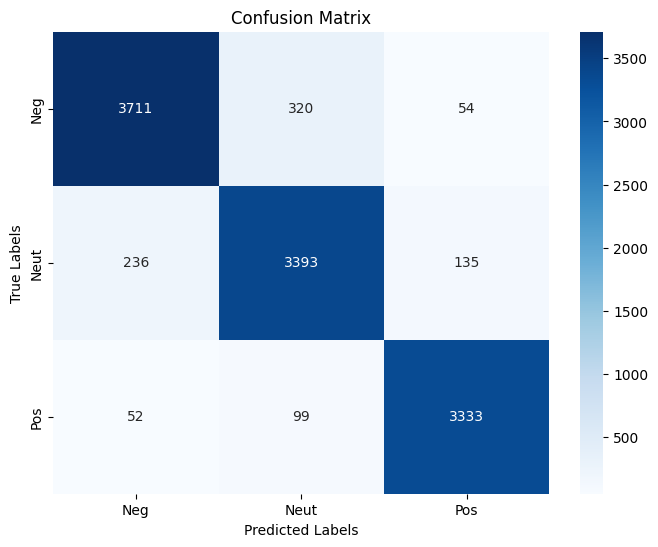

In [ ]:
# Reset index and convert DataFrame to Dataset
df_original = df_original.reset_index(drop=True)
dataset = Dataset.from_pandas(df_original[['Post', 'label']])  # Note the 'label' column

# Load CAMeL-BERT tokenizer and model for sequence classification
model_name = 'CAMeL-Lab/bert-base-arabic-camelbert-da'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Ensure all model tensors are contiguous before saving/loading
def make_model_tensors_contiguous(model):
    for param in model.parameters():
        param.data = param.data.contiguous()

make_model_tensors_contiguous(model)

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['Post'], padding='max_length', truncation=True, max_length=128)

# Map tokenization function to dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Split the dataset into training and evaluation (test) sets
split_dataset = tokenized_dataset.train_test_split(test_size=0.2)

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',                  # Output directory for model checkpoints
    evaluation_strategy='epoch',             # Evaluate after every epoch
    save_strategy='epoch',                   # Save model after every epoch
    learning_rate=3e-5,                      # Set the learning rate
    per_device_train_batch_size=16,          # Batch size for training
    per_device_eval_batch_size=16,           # Batch size for evaluation
    num_train_epochs=1,                      # Number of epochs
    weight_decay=0.01,                       # Weight decay for regularization
    logging_dir='./logs',                    # Log directory
    logging_steps=10,                        # Log every 10 steps
    load_best_model_at_end=True,             # Load best model at the end of training
    save_total_limit=2                       # Limit to saving two checkpoints to save disk space
)


# Define the evaluation metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Initialize the Trainer and fine-tune the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=split_dataset['train'],
    eval_dataset=split_dataset['test'],
    compute_metrics=compute_metrics,
    # Uncomment if needed
    # callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

# Fine-tune the model
trainer.train()

# Evaluate the model on the test set
print("Evaluation on the test set:")
evaluation_results = trainer.evaluate()

# Additional testing code for manual evaluation
test_results = trainer.predict(split_dataset['test'])

# Extract predictions and true labels
predictions = torch.argmax(torch.tensor(test_results.predictions), axis=1)
true_labels = test_results.label_ids

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate classification report (precision, recall, F1-score)
label_mapping = {'Neg': 0, 'Neut': 1, 'Pos': 2}
print("Classification Report on Test Set:")
print(classification_report(true_labels, predictions, target_names=list(label_mapping.keys())))

# Generate confusion matrix and plot it
cm = confusion_matrix(true_labels, predictions)

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm, labels=list(label_mapping.keys()))
